# XGBoost
- [XGBoost](https://xgboost.readthedocs.io/en/latest/)を使って勾配ブースティング木（GBDT）を構築し、多クラス分類を解いてみよう
- ハイパーパラメータを変更して、結果の変化を確認しよう
- graphvizを使って各決定木の中身を可視化してみよう

## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# データセット
from sklearn.datasets import load_iris
# データの分割
from sklearn.model_selection import train_test_split 
# 多クラス分類の評価指標
from sklearn.metrics import accuracy_score, classification_report

# XGBoostの分類モデルと可視化用の関数
from xgboost import XGBClassifier, plot_tree

# Warningを非表示に設定
import warnings
warnings.simplefilter('ignore', UserWarning)


## 2. データの読み込み
- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
  - アヤメの品種分類のデータセット
  - 目的変数（クラス）
      - Setosa
      - Versicolor
      - Virginica
  - 説明変数
      - Sepal Length（萼片の長さ）
      - Sepal Width（萼片の幅）
      - Petal Length（花弁の長さ）
      - Petal Width（花弁の幅）

In [2]:
# データセットの読み込み
iris = load_iris()

# 説明変数をデータフレームに変換
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# 目的変数をデータフレームに追加
df_iris["label"] = iris.target

# クラス番号を文字列に置き換え
df_iris["label"] = df_iris["label"].map(
    {0:iris.target_names[0], 
     1:iris.target_names[1], 
     2:iris.target_names[2]}
)

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. データの可視化

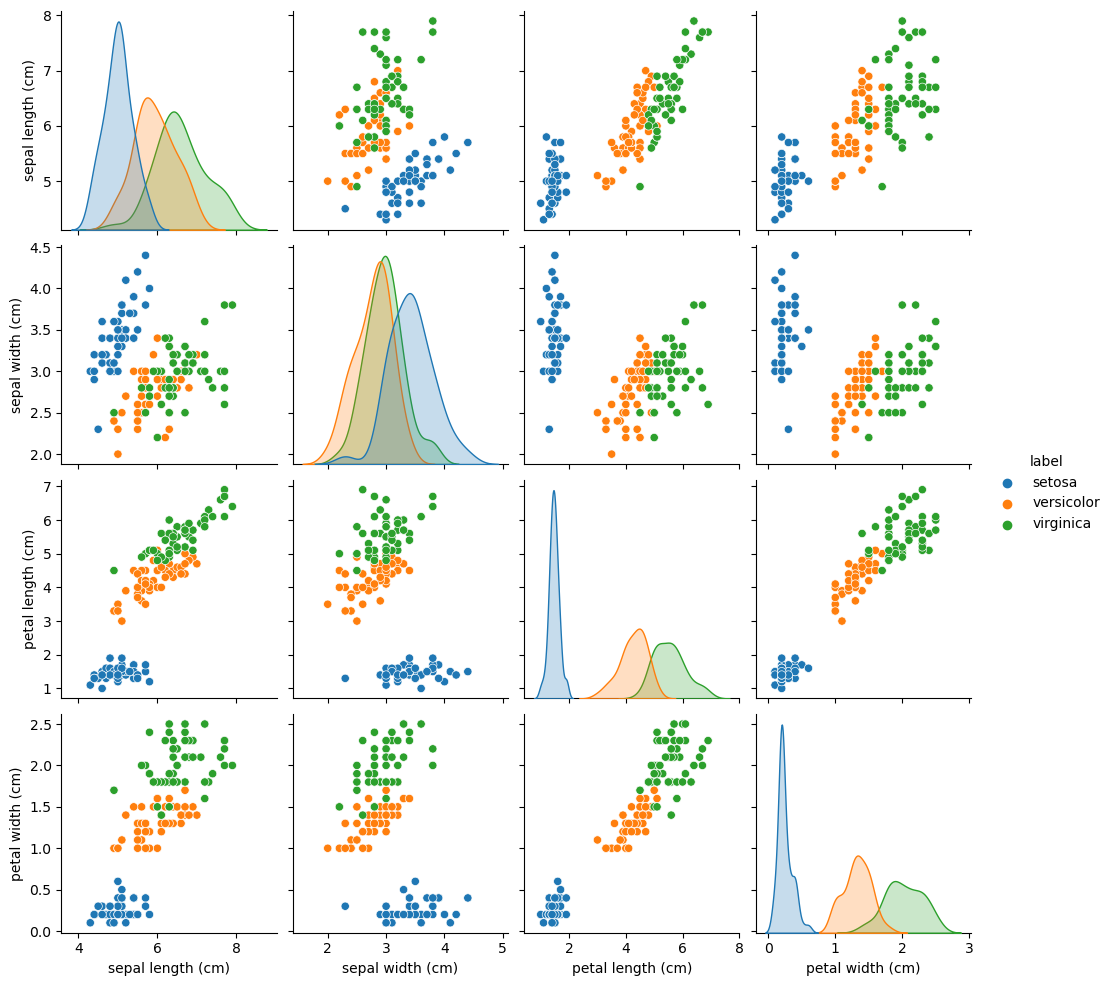

In [3]:
# 散布図行列の表示（クラスごとに色分け）
sns.pairplot(df_iris, hue="label")
plt.show()

## 4. モデルの構築・学習
[XGBClassifier()](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)を利用
- objective
    - モデルの出力形式
    - 多クラス場合は"multi:softmax"（ソフトマックス関数）
    - 二値分類の場合は"binary:logistic"（シグモイド関数）
- n_estimators
    - ブースティングのステージ数
    - 構築する弱学習器の数
- learning_rate
    - ブースティングのステージごとの学習率
    

In [4]:
# 学習用・テスト用の分割
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=1234
)

# XGBoostモデルの構築
# learning_rate：学習率を指定
# objective：出力時に適用する関数
clf = XGBClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=10, 
    objective="multi:softmax", random_state=1234)

# モデルの学習
clf.fit(X_train, y_train)

# 訓練性能の確認
print("train_accuracy:", clf.score(X_train, y_train.reshape(-1,1)))

train_accuracy: 1.0


### [演習]
* n_estimatorsの値を変更してみましょう
* learning_rateの値を変更してみましょう
* max_depthの値を変更してみましょう


## 5. モデルの評価

In [5]:
# 汎化性能の確認
print("test_accuracy:", clf.score(X_test, y_test))

# 予測結果の取得
y_pred = clf.predict(X_test)

# 評価指標の確認
scores = classification_report(y_test, y_pred)
print(scores)

test_accuracy: 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.96      0.98        23
           2       0.95      1.00      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



## 6. 変数の重要度を確認

[0.02052428 0.03016081 0.6625646  0.28675035]


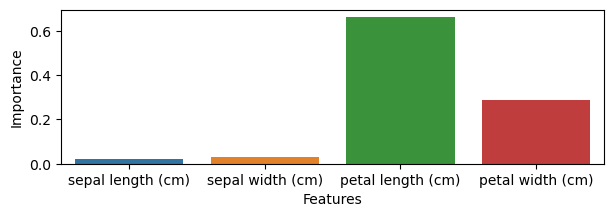

In [6]:
# 説明変数の重要度を出力する
# 重要度＝ある説明変数による不純度の減少量の合計
print(clf.feature_importances_)

# データフレームの作成
feature_imp = pd.DataFrame(
    clf.feature_importances_, 
    index=iris.feature_names, columns=['Importance']
)

# 棒グラフの表示
plt.figure(figsize=(7,2))
sns.barplot(x=feature_imp.index, y=feature_imp['Importance'])
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

## 7. モデルの可視化

Rendering Tree 0...
Rendering Tree 1...
Rendering Tree 2...
Rendering Tree 3...
Rendering Tree 4...
Rendering Tree 5...
Rendering Tree 6...
Rendering Tree 7...
Rendering Tree 8...
Rendering Tree 9...


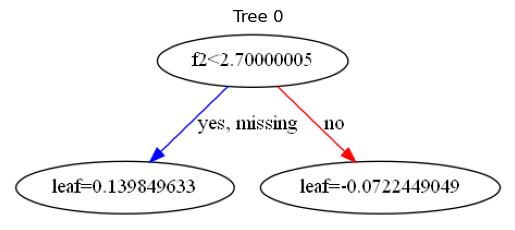

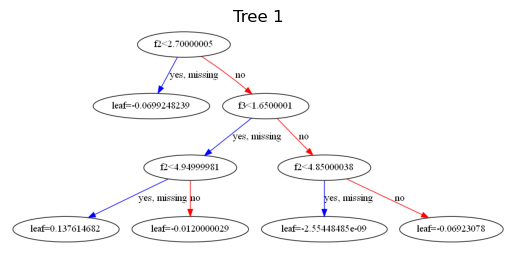

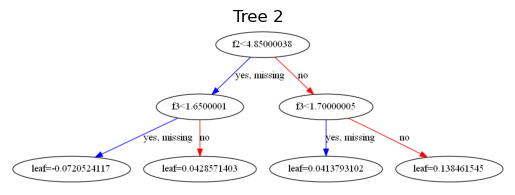

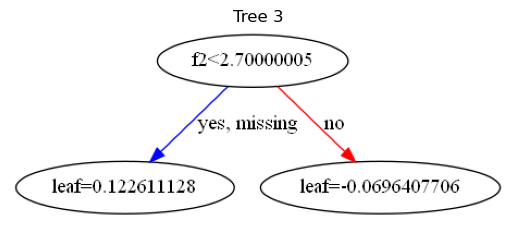

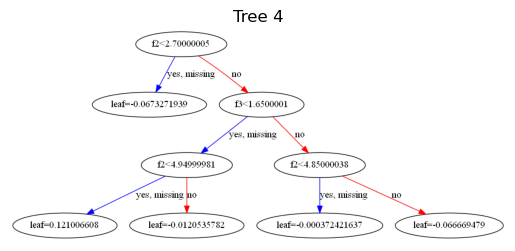

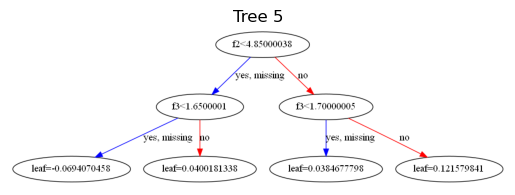

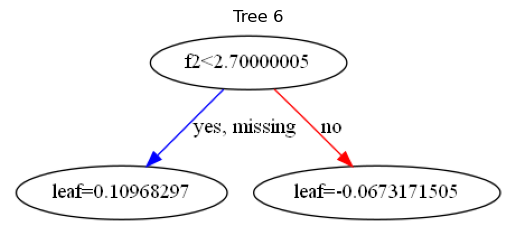

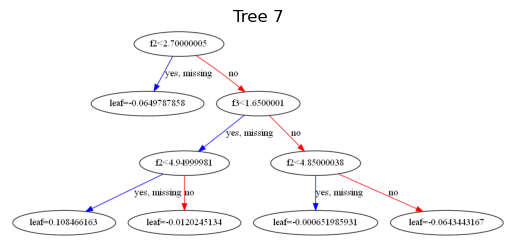

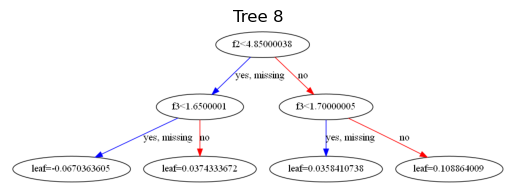

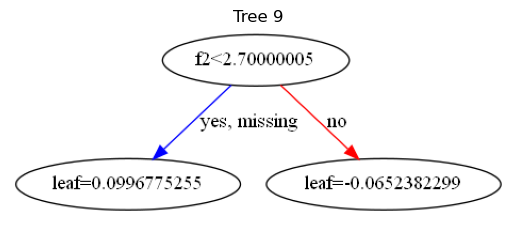

In [7]:
# 木の描画本数
plot_tree_num = 10 

# 木を可視化
for tree_id in range(plot_tree_num):
    print("Rendering Tree {:d}...".format(tree_id))
    # 図の作成・表示
    ax = plot_tree(clf, num_trees=tree_id)
    ax.set_title(("Tree " + str(tree_id)))
    plt.plot()